# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
ad_data=pd.read_csv('../app/data/advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

** Checking info of dataset**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

## Exploratory Data Analysis


** See the Age of users**

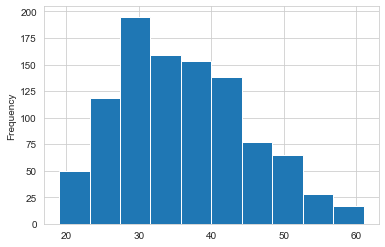

In [6]:
sns.set_style('whitegrid')
ad_data['Age'].plot(kind='hist')

**Create a jointplot showing Area Income versus Age.**

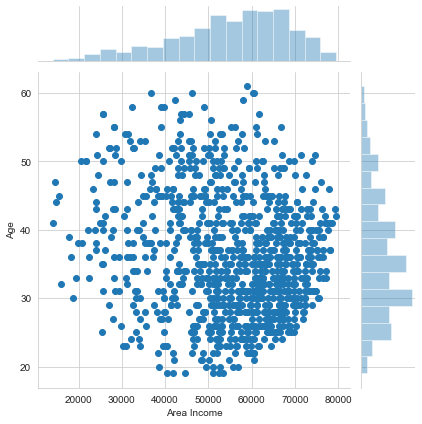

In [7]:
sns.jointplot(ad_data['Area Income'], ad_data['Age'])

`This data looks like normally distributed, it's fake data so I don't want to dig deeper into it.`

**showing the kde distributions of Daily Time spent on site vs. Age.**

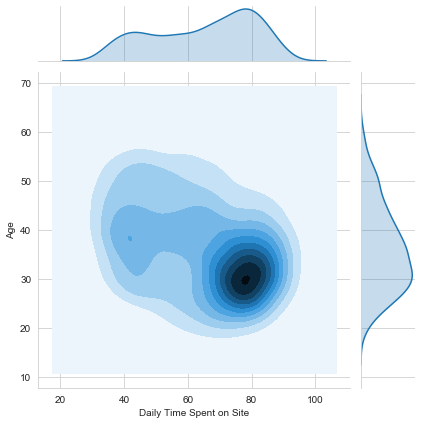

In [9]:
sns.jointplot(ad_data['Daily Time Spent on Site'],ad_data['Age'],kind="kde")

`Seems like from age 20-40 people spent most time in site`

** See the relationship between 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

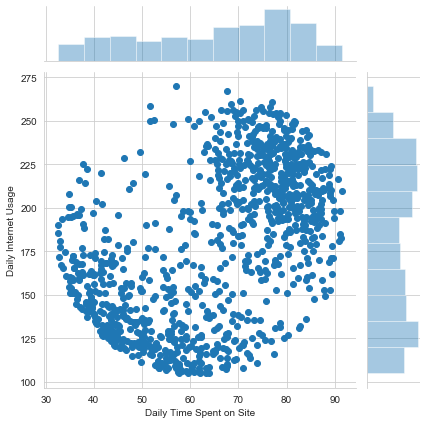

In [10]:
sns.jointplot(ad_data['Daily Time Spent on Site'],ad_data['Daily Internet Usage'])

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**
** To know the relation of "Clicked" with each column.**

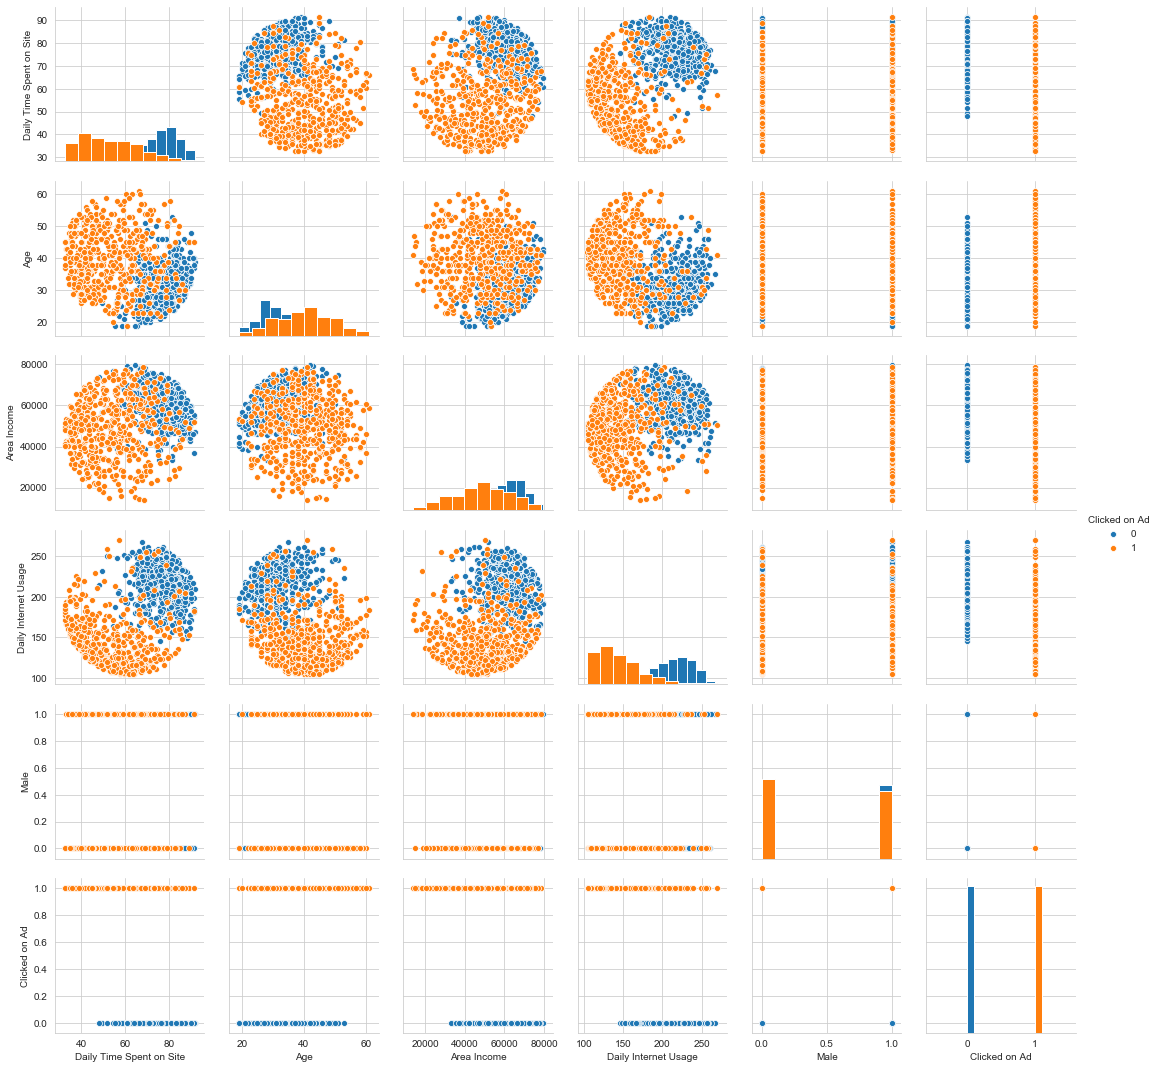

In [11]:
sns.pairplot(data=ad_data,hue='Clicked on Ad', diag_kind="hist")


# Logistic Regression

** Spliting the data into training set and testing set**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [10]:
X=ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male']]
y=ad_data['Clicked on Ad']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
import pickle
pickle.dump(logreg,open('model.pickel','wb'))

## Predictions and Evaluations
** Now predict values for the testing data.**

In [18]:
prediction = logreg.predict(X_test)

** Create a classification report for the model.**

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
print(classification_report(y_test,prediction))

precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,prediction)

array([[170,   1],
       [  5, 154]])

In [23]:
print(accuracy_score(y_test,prediction)*100)

98.18181818181819


## We've got 98 % accuracy.